<a href="https://colab.research.google.com/github/abdulxs/Pattern-Recognition/blob/main/PR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = np.loadtxt('/content/alabama.txt')
years = data[:,0]
enrollments = data [:,1]
enrollments

array([13055., 13563., 13867., 14696., 15460., 15311., 15603., 15861.,
       16807., 16919., 16388., 15433., 15497., 15145., 15163., 15984.,
       16859., 18150., 18970., 19328., 19337., 18876.])

Text(0.5, 1.0, 'Alabama Enrollments')

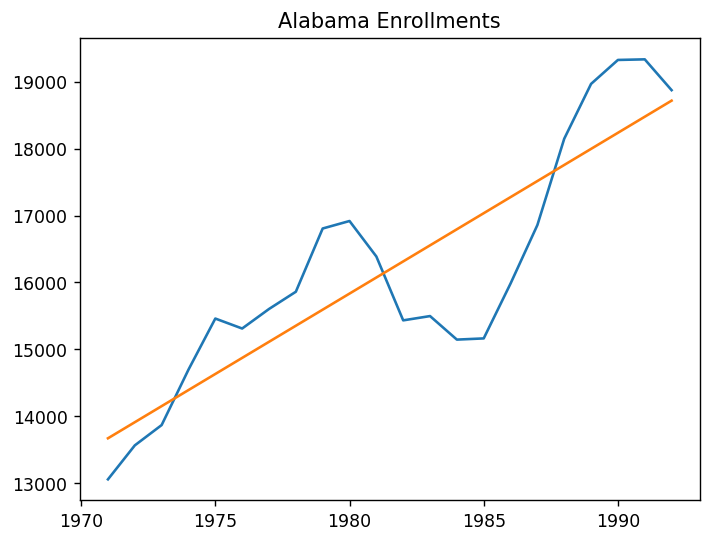

In [ ]:
w1 = np.sum((years - years.mean()) * (enrollments - enrollments.mean())) / np.sum((years - years.mean())**2)
w0 = enrollments.mean() - w1 * years.mean()

x_range = np.linspace(years.min(), years.max(), 100)
_ = plt.figure(dpi=125)
plt.plot(years, enrollments)
plt.plot(x_range, w0 + w1 * x_range)
plt.title("Alabama Enrollments")


In [ ]:
print("prediction for 2050: %.if" % (w0 + w1 * 2050))

prediction for 2050: 32667f


Linear regression presumes that the relationship between the year and the number of enrolled students follows a straight line. However, this assumption may not hold true, particularly with a time-series data like ours.

In the Alabama dataset, there was a decline in enrollment between 1980 and 1985. Linear regression failed to capture this decline because it is limited to representing straight-line relationships, and it did not align well with the actual enrollment pattern during that period.

**Task 2**

In [ ]:
NUM_SETS = 5
min_enroll, max_enroll = enrollments.min(), enrollments.max()

fuzzy_edges = np.linspace(min_enroll, max_enroll, NUM_SETS + 2)
fuzzy_spacing = fuzzy_edges[1] - fuzzy_edges[0]

fuzzy_enrollments = enrollments > fuzzy_edges[1:-1, None] + fuzzy_spacing
fuzzy_enrollments = np.argmin(fuzzy_enrollments, axis=0) + (fuzzy_enrollments[-1, :] ==1) * (NUM_SETS-1)



In [ ]:
rules = {}

for i in range(len(fuzzy_enrollments)-1):
  origin_set = fuzzy_enrollments[i]
  next_set = fuzzy_enrollments[i+1]
  rules[origin_set] = rules.get(origin_set, set()).union([next_set])




In [ ]:
prediction_years = []
prediction_enrolls = []
for i in range(len(data)-1):
  prediction_years.append(years[i + 1])
  fuzzy_now = fuzzy_enrollments[i]
  successives = rules[fuzzy_now]

  successives_peaks = [fuzzy_edges[x + 1] for x in successives]
  defuzz = np.mean(successives_peaks)
  prediction_enrolls.append(defuzz)

Text(0.5, 1.0, 'fuzzy sets: 5')

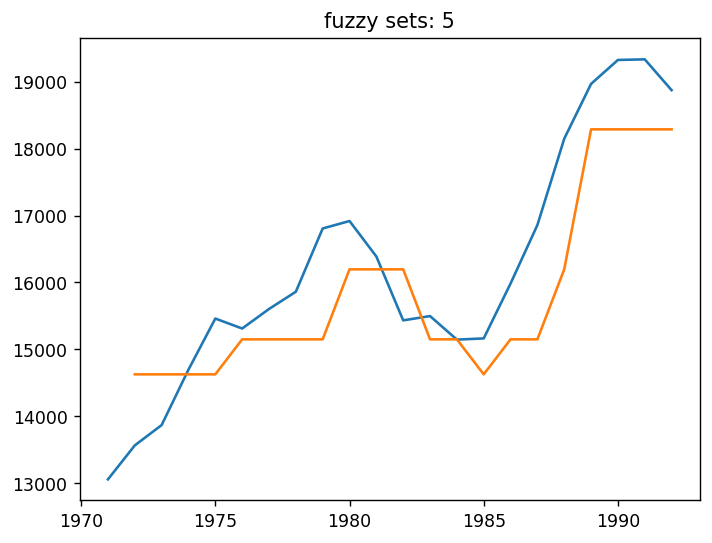

In [ ]:
_ = plt.figure(dpi=125)
plt.plot(years, enrollments)
plt.plot(prediction_years, prediction_enrolls)
plt.title("fuzzy sets: %d" %NUM_SETS)

What happens if number if sets are too low or too high?

When sets are too low, it results in oversimplified models with flat trends.

When sets are too high, the predicted set is the same as the original set, this may be due to overfitting.